In [6]:
from rdkit.Chem import Descriptors
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdDistGeom
from typing import List, Tuple
import numpy as np
import rdkit
import pandas as pd
from pymatgen.core import Structure, Lattice, Molecule

smiles = 'CC(C)C'

m = Chem.MolFromSmiles(smiles)
# necessary to add hydrogen for consistent conformer generation
m = Chem.AddHs(m)


Descriptors.Ipc(m)



312.0805106354346

In [2]:
import json
import gzip

from utils import download_url

#raw_url= "https://ml.materialsproject.org/projects/matbench_mp_is_metal.json.gz"
#raw_dir= "../data/matbench/mp_is_metal"
#download_url(raw_url, raw_dir)


json_filename = "../data/matbench/mp_is_metal/matbench_mp_is_metal.json.gz"


with gzip.open(json_filename, 'r') as fin:        # 4. gzip
    json_bytes = fin.read()                      # 3. bytes (i.e. UTF-8)

json_str = json_bytes.decode('utf-8')            # 2. string (i.e. JSON)
data = json.loads(json_str) 


from pymatgen.core.structure import Structure, Molecule


struct= Structure.from_dict(data["data"][0][0])

In [12]:
from pymatgen.core.lattice import Lattice

structure = Structure(
    Lattice.cubic(4.2),
    ["Na", "K", "K"],
    [[0, 0, 0], [0.5, 0.5, 0.5], [0,0,0.5]],
    site_properties={"magmom": [-2, 2,2]},
)

In [13]:
from pymatgen.io.babel import BabelMolAdaptor

# we will compute distances directly using the pymatgen structure

#then the following conversion : pymatgen.Structure -> pymatgen.Molecule -> pybel_mol -> mol file (to retain 3D information) ->  rdkit molecule
mol = Molecule(species=structure.species, coords=structure.cart_coords)
adaptor = BabelMolAdaptor(mol).pybel_mol

#ideally, we would like to give the correct 3D coordinates to the molecule, so we use .mol file
mol_file = adaptor.write('mol')


new_mol = Chem.MolFromMolBlock(mol_file)

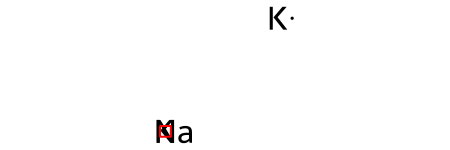

In [14]:
new_mol

In [9]:
structure

Structure Summary
Lattice
    abc : 4.2 4.2 4.2
 angles : 90.0 90.0 90.0
 volume : 74.08800000000001
      A : 4.2 0.0 0.0
      B : 0.0 4.2 0.0
      C : 0.0 0.0 4.2
    pbc : True True True
PeriodicSite: Na (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: K (2.1000, 2.1000, 2.1000) [0.5000, 0.5000, 0.5000]